# Initialization

##Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from ast import literal_eval

##Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Internship/Summer 2022/sampled_labeled_preprocessed_1402.csv" .
!cp "/content/drive/MyDrive/Internship/Summer 2022/preprocessed.csv" .

In [ ]:
df = pd.read_csv('/content/sampled_labeled_preprocessed_1402.csv')

#EDA

In [ ]:
df.head()

,conversation_id,retweets_count,mentions,created_at,likes_count,in_reply_to_user_id,_id,source,user_id,in_reply_to_status_id,...,urls,tweet,hashtags,tweet_tokens,lemmatized_tweet,lemmatized_tweet_token,tweet_size,lemmatized_tweet_size,position,index_dup
0,1354546598500569097,0,NaN,2021-01-27 21:47:29+00:00,3,NaN,1354546598500569097,Twitter for iPhone,772526373831344128,NaN,...,NaN,دورکاری کار میگی هفته‌ست تسک انجام میدی نادانم...,[],"['دورکاری', 'کار', 'میگی', 'هفته\u200cست', 'تس...",دورکاری کار هفته‌ست تسک انجام میدی نادان امضا ...,"['دورکاری', 'کار', 'هفته\u200cست', 'تسک', 'انج...",13,11,1,54
1,1380855270033797120,0,['1905589586'],2021-04-10 14:26:01+00:00,2,1.905590e+09,1380889813340028935,Twitter for Android,250697076,1.380855e+18,...,NaN,هستندبانکها ظرفیت کار میکنن تازه جالب بیماری ش...,[],"['هستندبانکها', 'ظرفیت', 'کار', 'میکنن', 'تازه...",هستندبانکها ظرفیت کار میکنن تازه جالب بیمار شی...,"['هستندبانکها', 'ظرفیت', 'کار', 'میکنن', 'تازه...",29,29,2,109
2,1378595571821383686,0,NaN,2021-04-04 06:29:32+00:00,1,7.796771e+17,1378595575365505024,Twitter for Android,779677145014599680,1.378596e+18,...,NaN,اداراتی خدمات غیرضروری ارائه کارمندان صورت دور...,[],"['اداراتی', 'خدمات', 'غیرضروری', 'ارائه', 'کار...",ادارات خدمات غیرضروری ارائه کارمند صورت دورکار...,"['ادارات', 'خدمات', 'غیرضروری', 'ارائه', 'کارم...",18,18,2,143
3,1378595571821383686,0,NaN,2021-04-04 06:29:32+00:00,1,NaN,1378595571821383686,Twitter for Android,779677145014599680,NaN,...,NaN,استاندار تهران شهرهای نارنجی جمله تهران کارمند...,[],"['استاندار', 'تهران', 'شهرهای', 'نارنجی', 'جمل...",استاندار تهران شهر نارنج جمله تهران کارمند مشا...,"['استاندار', 'تهران', 'شهر', 'نارنج', 'جمله', ...",28,28,1,144
4,1375700048445595653,0,NaN,2021-03-27 06:43:45+00:00,19,NaN,1375700048445595653,Twitter Web App,2876691,NaN,...,NaN,شرکت دورکاری دفعه موضوعی می‌شدیم می‌رفتیم میز ...,[],"['شرکت', 'دورکاری', 'دفعه', 'موضوعی', 'می\u200...",شرکت دورکاری دفعه موضوع میز همدیگه بازخورد حرف...,"['شرکت', 'دورکاری', 'دفعه', 'موضوع', 'میز', 'ه...",19,16,0,150


In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"])
type(df["created_at"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df = df.sort_values(by='created_at',ascending=False)

,conversation_id,retweets_count,mentions,created_at,likes_count,in_reply_to_user_id,_id,source,user_id,in_reply_to_status_id,...,urls,tweet,hashtags,tweet_tokens,lemmatized_tweet,lemmatized_tweet_token,tweet_size,lemmatized_tweet_size,position,index_dup
1416,1529905267973967879,0,['1479590387178254337'],2022-05-26 21:08:57+00:00,1,1.479590e+18,1529932626257231877,Twitter for Android,3077864527,1.529932e+18,...,NaN,دورکاری 😉,[],"['دورکاری', '😉']",دورکاری 😉,"['دورکاری', '😉']",2,2,2,42408
1333,1529092391138902022,0,['2649227545'],2022-05-24 19:44:12+00:00,0,2.649228e+09,1529186523144495107,Twitter for Android,949232661796671488,1.529186e+18,...,NaN,کرمان هیچی دورکاری دلیل مسافت رد میشه,[],"['کرمان', 'هیچی', 'دورکاری', 'دلیل', 'مسافت', ...",کرمان دورکاری دلیل مسافت رد میشه,"['کرمان', 'دورکاری', 'دلیل', 'مسافت', 'رد', 'م...",7,6,0,39606
1342,1528811252444692480,1,NaN,2022-05-23 18:53:01+00:00,3,NaN,1528811252444692480,Twitter for Android,731373043,NaN,...,NaN,دوستان ui ux سوالو پرسیدم جوابی نگرفتم میشه کا...,"['طراح', 'uidesign', 'uxdesign', 'uxwriting', ...","['دوستان', 'ui', 'ux', 'سوالو', 'پرسیدم', 'جوا...",دوستان ui ux سوالو پرسید جواب میشه کار حوزه دو...,"['دوستان', 'ui', 'ux', 'سوالو', 'پرسید', 'جواب...",16,15,1,40146
1390,1528704142692302850,0,NaN,2022-05-23 11:47:24+00:00,1,NaN,1528704142692302850,Twitter Web App,1373329796177002496,NaN,...,['http://t.ly/HN1-'],مناطق ترکیه دورکاری,[],"['مناطق', 'ترکیه', 'دورکاری']",مناطق ترکیه دورکاری,"['مناطق', 'ترکیه', 'دورکاری']",3,3,1,41707
1414,1528610675899125760,0,['240586819'],2022-05-23 10:19:18+00:00,1,2.405868e+08,1528681974671544322,Twitter for iPhone,999277400650338304,1.528681e+18,...,NaN,بعدش اسنپ تپسی گرانتر فحشم ندی 😂 تازه شهری قان...,[],"['بعدش', 'اسنپ', 'تپسی', 'گرانتر', 'فحشم', 'ند...",اسنپ تپسی گران فحشم ندی 😂 تازه شهر قانون کار ا...,"['اسنپ', 'تپسی', 'گران', 'فحشم', 'ندی', '😂', '...",26,25,1,42359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,260377109338415104,0,NaN,2012-10-22 13:48:35+00:00,0,NaN,260377109338415104,twitterfeed,111164962,NaN,...,['http://tinyurl.com/8tsmt2v'],اداره گچساران قانون دورکاری بانوان دریافت خبر ...,[],"['اداره', 'گچساران', 'قانون', 'دورکاری', 'بانو...",اداره گچساران قانون دورکاری بانوان دریافت خبر ...,"['اداره', 'گچساران', 'قانون', 'دورکاری', 'بانو...",13,13,1,33920
1110,243215856195231744,0,NaN,2012-09-05 05:15:53+00:00,0,NaN,243215856195231744,twitterfeed,16249440,NaN,...,['http://bit.ly/ORHd20'],انحراف طرحدورکاری 4 هدف اصلی,[],"['انحراف', 'طرحدورکاری', '4', 'هدف', 'اصلی']",انحراف طرحدورکاری 4 هدف اصل,"['انحراف', 'طرحدورکاری', '4', 'هدف', 'اصل']",5,5,1,33307
40,222590438010392576,0,NaN,2012-07-10 07:17:50+00:00,0,NaN,222590438010392576,Facebook,269630000,NaN,...,['http://fb.me/10veMGnbf'],پسر تگزاسی کار خانه افتاده فروشگاهای میفروشند,[],"['پسر', 'تگزاسی', 'کار', 'خانه', 'افتاده', 'فر...",پسر تگزاس کار خانه افتاده فروشگاهای میفروشند,"['پسر', 'تگزاس', 'کار', 'خانه', 'افتاده', 'فرو...",7,7,1,1277
1030,203308461109411841,0,NaN,2012-05-18 02:18:09+00:00,0,NaN,203308461109411841,Twitter for Android,21835372,NaN,...,NaN,دورکاری=خرکاری,[],['دورکاری=خرکاری'],دورکاری=خرکاری,['دورکاری=خرکاری'],1,1,0,30872


In [ ]:
df

,conversation_id,retweets_count,mentions,created_at,likes_count,in_reply_to_user_id,_id,source,user_id,in_reply_to_status_id,...,urls,tweet,hashtags,tweet_tokens,lemmatized_tweet,lemmatized_tweet_token,tweet_size,lemmatized_tweet_size,position,index_dup
0,1354546598500569097,0,NaN,2021-01-27 21:47:29+00:00,3,NaN,1354546598500569097,Twitter for iPhone,772526373831344128,NaN,...,NaN,دورکاری کار میگی هفته‌ست تسک انجام میدی نادانم...,[],"['دورکاری', 'کار', 'میگی', 'هفته\u200cست', 'تس...",دورکاری کار هفته‌ست تسک انجام میدی نادان امضا ...,"['دورکاری', 'کار', 'هفته\u200cست', 'تسک', 'انج...",13,11,1,54
1,1380855270033797120,0,['1905589586'],2021-04-10 14:26:01+00:00,2,1.905590e+09,1380889813340028935,Twitter for Android,250697076,1.380855e+18,...,NaN,هستندبانکها ظرفیت کار میکنن تازه جالب بیماری ش...,[],"['هستندبانکها', 'ظرفیت', 'کار', 'میکنن', 'تازه...",هستندبانکها ظرفیت کار میکنن تازه جالب بیمار شی...,"['هستندبانکها', 'ظرفیت', 'کار', 'میکنن', 'تازه...",29,29,2,109
2,1378595571821383686,0,NaN,2021-04-04 06:29:32+00:00,1,7.796771e+17,1378595575365505024,Twitter for Android,779677145014599680,1.378596e+18,...,NaN,اداراتی خدمات غیرضروری ارائه کارمندان صورت دور...,[],"['اداراتی', 'خدمات', 'غیرضروری', 'ارائه', 'کار...",ادارات خدمات غیرضروری ارائه کارمند صورت دورکار...,"['ادارات', 'خدمات', 'غیرضروری', 'ارائه', 'کارم...",18,18,2,143
3,1378595571821383686,0,NaN,2021-04-04 06:29:32+00:00,1,NaN,1378595571821383686,Twitter for Android,779677145014599680,NaN,...,NaN,استاندار تهران شهرهای نارنجی جمله تهران کارمند...,[],"['استاندار', 'تهران', 'شهرهای', 'نارنجی', 'جمل...",استاندار تهران شهر نارنج جمله تهران کارمند مشا...,"['استاندار', 'تهران', 'شهر', 'نارنج', 'جمله', ...",28,28,1,144
4,1375700048445595653,0,NaN,2021-03-27 06:43:45+00:00,19,NaN,1375700048445595653,Twitter Web App,2876691,NaN,...,NaN,شرکت دورکاری دفعه موضوعی می‌شدیم می‌رفتیم میز ...,[],"['شرکت', 'دورکاری', 'دفعه', 'موضوعی', 'می\u200...",شرکت دورکاری دفعه موضوع میز همدیگه بازخورد حرف...,"['شرکت', 'دورکاری', 'دفعه', 'موضوع', 'میز', 'ه...",19,16,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1434529412469477378,0,NaN,2021-09-05 14:50:38+00:00,10,NaN,1434529412469477378,Twitter for Android,878308932267069440,NaN,...,NaN,فهمیدم جنبه دورکاری,[],"['فهمیدم', 'جنبه', 'دورکاری']",فهمید جنبه دورکاری,"['فهمید', 'جنبه', 'دورکاری']",3,3,0,45250
1496,1434185634302865411,0,"['15090494', '991998010224717825']",2021-09-05 14:07:21+00:00,1,7.545474e+17,1434518518859452421,Twitter for Android,754547424354562048,1.434518e+18,...,NaN,رزومه موقعیت شغلی دورکار سایت جابینجا کاربوم ت...,[],"['رزومه', 'موقعیت', 'شغلی', 'دورکار', 'سایت', ...",رزومه موقعیت شغل دورکار سایت جابینجا کاربوم تب...,"['رزومه', 'موقعیت', 'شغل', 'دورکار', 'سایت', '...",12,11,1,45251
1497,1439062997452926976,0,NaN,2021-09-18 03:05:29+00:00,10,NaN,1439062997452926976,Twitter for Android,15324320,NaN,...,NaN,شرکت دورکار,[],"['شرکت', 'دورکار']",شرکت دورکار,"['شرکت', 'دورکار']",2,2,1,45280
1498,1454530567958056960,0,NaN,2021-10-30 19:28:07+00:00,0,1.364686e+18,1454530572596957189,Twitter for Android,1364686373802901515,1.454531e+18,...,NaN,زندانی زندان‌ها نیروی کار مجانی برند متل خدمت ...,[],"['زندانی', 'زندان\u200cها', 'نیروی', 'کار', 'م...",زندان زندان نیرو کار مجانی برد متل خدمت اجبار ...,"['زندان', 'زندان', 'نیرو', 'کار', 'مجانی', 'بر...",26,26,1,45344


1    1060
2     282
0     158
Name: position, dtype: int64
------------------------------------


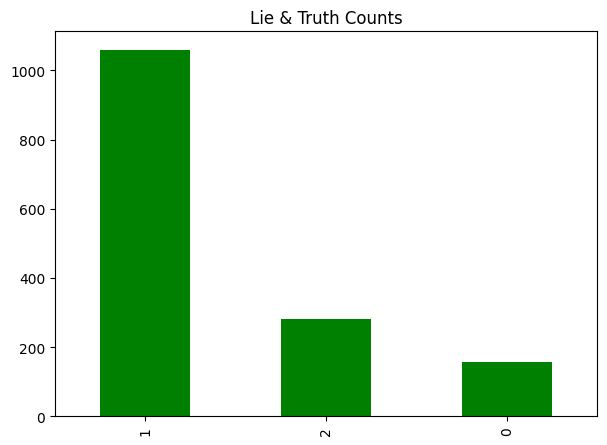

In [ ]:
print(df["position"].value_counts())
print("------------------------------------")

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
plt.title('Lie & Truth Counts')
df["position"].value_counts().plot.bar(color = 'green')
plt.show()

# Naive Bayes Classifier

In [ ]:
class NBClassifier:
    def __init__(self):
      df = pd.read_csv('/content/sampled_labeled_preprocessed_1402.csv')
      df["position"] = df["position"].astype(str)
      self.train_df, self.test_df = train_test_split(df, test_size=0.1, random_state=1, stratify=df['position'])
      self.train_df = self.train_df.reset_index(drop=True)
      self.test_df = self.test_df.reset_index(drop=True)
      self.all_data_df = pd.read_csv('/content/preprocessed.csv')
      self.all_data_df["created_at"] = pd.to_datetime(self.all_data_df["created_at"])
      self.all_data_df = self.all_data_df.sort_values(by='created_at', ascending=False)

    def encode_classes(self, df):
      return df.position.map(self.encoded_dict)

    def extract_features(self, preprocessed_data_train, preprocessed_data_test):
      bow_output_train, bow_output_test = self.calculate_bag_of_words(preprocessed_data_train, preprocessed_data_test)
      print("shape train bow: ", bow_output_train.shape)
      print("shape test bow: ", bow_output_train.shape)
      new_train_df  = pd.DataFrame(bow_output_train)
      new_test_df  = pd.DataFrame(bow_output_test)
      return new_train_df , new_test_df

    def calculate_bag_of_words(self, x_train, x_test):
      x_train_texts = [' '.join(item) for item in x_train]
      x_test_texts = [' '.join(item) for item in x_test]
      vectorizer = CountVectorizer()
      training_data = vectorizer.fit_transform(x_train_texts)
      test_data  = vectorizer.transform(x_test_texts)
      return training_data.toarray(), test_data.toarray()

    def train_the_model(self, x_train, x_test, y_train):
      x_train, x_test, y_train = np.array(x_train), np.array(x_test), np.array(y_train)
      NB = MultinomialNB()
      y_pred = NB.fit(x_train, y_train).predict(x_test)
      return y_pred

    def print_confusion_matrix(self, y_test, y_pred):
      conf_mat = confusion_matrix(y_test, y_pred)
      ax = plt.subplot()
      sns.heatmap(conf_mat, annot = True, ax = ax, linewidths = 5, linecolor = 'y', center = 0)
      ax.set_title('Confusion Matrix')
      ax.set_xlabel('Predicted') 
      ax.set_ylabel('Actual')
      ax.xaxis.set_ticklabels(['0','1', '2'])
      ax.yaxis.set_ticklabels(['0','1', '2'])
      plt.show()

    def evaluate(self, y_test, y_pred):
      print(f"Accuracy: {format(accuracy_score(y_test, y_pred))}")
      print(f"Recall: {format(recall_score(y_test, y_pred, average='weighted'))}") #micro, macro or weighted
      print(f"Precision: {format(precision_score(y_test, y_pred, average='weighted'))}")
      print(f"F1 score: {format(f1_score(y_test, y_pred, average='weighted'))}")
      print("classification report:\n", classification_report(y_test, y_pred))

    
    def pre(self):
      preprocessed_train_data = self.clean_data(self.train_df["tweet"])
      preprocessed_test_data = self.clean_data(self.test_df["tweet"])
      return preprocessed_train_data, preprocessed_test_data

    def get_list_of_lemmatized_list(self, df):
      ls = []
      for row in df["lemmatized_tweet_token"]:
        ls.append(literal_eval(row))
      return ls

    def classify(self):
      preprocessed_train_data = self.get_list_of_lemmatized_list(self.train_df)
      preprocessed_all_data = self.get_list_of_lemmatized_list(self.all_data_df)
      all_features_X_train, x_all_data = self.extract_features(preprocessed_train_data, preprocessed_all_data)
      x_train, y_train = all_features_X_train, self.train_df["position"]
      min_max_scaler = preprocessing.MinMaxScaler()
      scaled_train = min_max_scaler.fit_transform(all_features_X_train.values)
      scaled_all_data = min_max_scaler.fit_transform(x_all_data.values)

      print('-----------------------------------------')
      print('number of train items: ', len(x_train))
      print('number of test items: ', len(x_all_data))
      print('-----------------------------------------')
      print('train value counts:\n', y_train.value_counts())
      print('----------------')
      x_train, x_all_data, y_train = np.array(x_train), np.array(x_all_data), np.array(y_train)
      NB = MultinomialNB()
      y_pred = NB.fit(x_train, y_train).predict(x_all_data)
      return self.all_data_df, y_pred

    

    def classify_and_evaluate(self):
      preprocessed_train_data = self.get_list_of_lemmatized_list(self.train_df)
      preprocessed_test_data = self.get_list_of_lemmatized_list(self.test_df)
      all_features_X_train, all_features_X_test = self.extract_features(preprocessed_train_data, preprocessed_test_data)
      x_train, y_train = all_features_X_train, self.train_df["position"]
      x_test, y_test = all_features_X_test, self.test_df["position"]
      min_max_scaler = preprocessing.MinMaxScaler()
      scaled_train = min_max_scaler.fit_transform(all_features_X_train.values)
      scaled_test = min_max_scaler.fit_transform(all_features_X_test.values)

      print('-----------------------------------------')
      print('number of train items: ', len(x_train))
      print('number of test items: ', len(x_test))
      print('-----------------------------------------')
      print('train value counts:\n', y_train.value_counts())
      print('----------------')
      print('test value counts\n', y_test.value_counts())
      print('-----------------------------------------')
      y_pred = self.train_the_model(scaled_train, scaled_test, y_train)
      self.evaluate(y_test, y_pred)
      self.print_confusion_matrix(y_test, y_pred)



#Train & Test

<ipython-input-21-786fd872dfa7>:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  self.all_data_df = pd.read_csv('/content/preprocessed.csv')


shape train bow:  (1350, 5215)
shape test bow:  (1350, 5215)
-----------------------------------------
number of train items:  1350
number of test items:  150
-----------------------------------------
train value counts:
 1    954
2    254
0    142
Name: position, dtype: int64
----------------
test value counts
 1    106
2     28
0     16
Name: position, dtype: int64
-----------------------------------------
Accuracy: 0.7133333333333334
Recall: 0.7133333333333334
Precision: 0.5774999999999999
F1 score: 0.6155607843137254
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.73      0.99      0.84       106
           2       0.33      0.07      0.12        28

    accuracy                           0.71       150
   macro avg       0.35      0.35      0.32       150
weighted avg       0.58      0.71      0.62       150



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

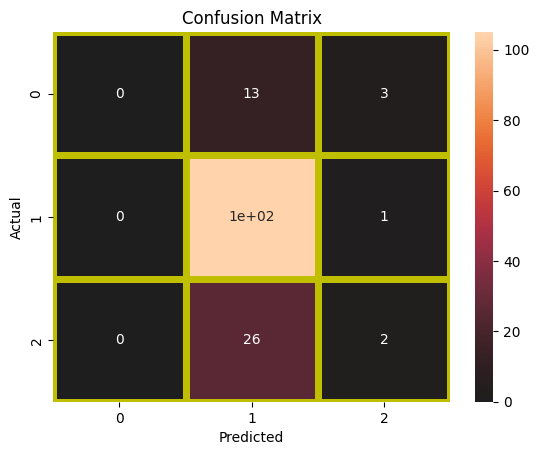

In [ ]:
classifier_nb = NBClassifier()
classifier_nb.classify_and_evaluate()

## Prediction on all dataframe

In [ ]:
dataframe, predictions = classifier_nb.classify()

shape train bow:  (1350, 5215)
shape test bow:  (1350, 5215)
-----------------------------------------
number of train items:  1350
number of test items:  45359
-----------------------------------------
train value counts:
 1    954
2    254
0    142
Name: position, dtype: int64
----------------


In [ ]:
dataframe

,conversation_id,retweets_count,mentions,created_at,likes_count,in_reply_to_user_id,_id,source,user_id,in_reply_to_status_id,...,quoted_status_id,cashtags,urls,tweet,hashtags,tweet_tokens,lemmatized_tweet,lemmatized_tweet_token,tweet_size,lemmatized_tweet_size
39243,1531715670999719937,0,['3139823745'],2022-05-31 21:36:48+00:00,2,3.139824e+09,1531751573088620544,Twitter for iPhone,1513460313206763521,1.531716e+18,...,NaN,NaN,NaN,دورکار نتایج,[],"['دورکار', 'نتایج']",دورکار نتایج,"['دورکار', 'نتایج']",2,2
39242,1531739672946294787,0,['1172489920386162689'],2022-05-31 21:20:56+00:00,1,1.172490e+18,1531747581973471232,Twitter for Android,1025476934690435072,1.531745e+18,...,NaN,NaN,NaN,دورکاری نیازی نمی‌دیدن بخوابن فرداش بیدار بشن ...,[],"['دورکاری', 'نیازی', 'نمی\u200cدیدن', 'بخوابن'...",دورکاری نمی‌دیدن بخوابن بیدار بشن کار کرونا نص...,"['دورکاری', 'نمی\u200cدیدن', 'بخوابن', 'بیدار'...",16,14
40364,1531734360252108804,0,NaN,2022-05-31 20:28:24+00:00,27,NaN,1531734360252108804,Twitter for Android,1171798925159915521,NaN,...,NaN,NaN,NaN,نظرتون میتونم صبح ظهر حضوری شرکت کار شبا شرکت ...,[],"['نظرتون', 'میتونم', 'صبح', 'ظهر', 'حضوری', 'ش...",نظرتون میتونم صبح ظهر حضور شرکت کار شبا شرکت ب...,"['نظرتون', 'میتونم', 'صبح', 'ظهر', 'حضور', 'شر...",16,16
40365,1531729515654823939,2,NaN,2022-05-31 20:09:09+00:00,57,NaN,1531729515654823939,Twitter for iPhone,1268612316255453185,NaN,...,NaN,NaN,['https://jobs.unicef.org/en-us/job/551063/con...,فرصت شغلی کریپتو unicef دورکاری ماهه پن مهلت ا...,[],"['فرصت', 'شغلی', 'کریپتو', 'unicef', 'دورکاری'...",فرصت شغل کریپتو unicef دورکاری ماهه پن مهلت ار...,"['فرصت', 'شغل', 'کریپتو', 'unicef', 'دورکاری',...",27,25
39788,1531378328753537025,0,NaN,2022-05-30 20:53:39+00:00,15,NaN,1531378328753537025,Twitter Web App,464858134,NaN,...,NaN,NaN,NaN,کارم شرکتمون همش همکار جدیده روزی یساعت باهم ت...,[],"['کارم', 'شرکتمون', 'همش', 'همکار', 'جدیده', '...",کاشت شرکتمون همکار جدیده یساعت باهم تصویر درمو...,"['کاشت', 'شرکتمون', 'همکار', 'جدیده', 'یساعت',...",19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,162253026575388673,0,NaN,2012-01-25 19:18:30+00:00,0,NaN,162253026575388673,Ping.fm,198984569,NaN,...,NaN,NaN,NaN,دختر تایلندی ماساژ کار خانه نیازمندیم,[],"['دختر', 'تایلندی', 'ماساژ', 'کار', 'خانه', 'ن...",دختر تایلند ماساژ کار خانه نیازمند,"['دختر', 'تایلند', 'ماساژ', 'کار', 'خانه', 'نی...",6,6
33325,161464833793990656,0,NaN,2012-01-23 15:06:30+00:00,0,NaN,161464833793990656,twitterfeed,135072078,NaN,...,NaN,NaN,['http://bit.ly/Afzhkf'],20 نگاهی کار خانه فریلنسینگ تالار گفتمان وب سا...,[],"['20', 'نگاهی', 'کار', 'خانه', 'فریلنسینگ', 'ت...",20 نگاه کار خانه فریلنسینگ تالار گفتمان وب سای...,"['20', 'نگاه', 'کار', 'خانه', 'فریلنسینگ', 'تا...",13,13
1274,161091232616022016,0,NaN,2012-01-22 14:21:57+00:00,0,NaN,161091232616022016,twitterfeed,135072078,NaN,...,NaN,NaN,['http://bit.ly/wqF3Bd'],20 ترجمه متون خانه فریلنسینگ کار خانه دلیل مزا...,[],"['20', 'ترجمه', 'متون', 'خانه', 'فریلنسینگ', '...",20 ترجمه متون خانه فریلنسینگ کار خانه دلیل مزا...,"['20', 'ترجمه', 'متون', 'خانه', 'فریلنسینگ', '...",13,13
33426,160657625187495936,0,NaN,2012-01-21 09:38:57+00:00,0,NaN,160657625187495936,twitterfeed,349427874,NaN,...,NaN,NaN,['http://bit.ly/A44qTv'],دورکاری کارمند تهران بیشترین داوطلبان دورکاری ...,[],"['دورکاری', 'کارمند', 'تهران', 'بیشترین', 'داو...",دورکاری کارمند تهران بیشترین داوطلب دورکاری خا...,"['دورکاری', 'کارمند', 'تهران', 'بیشترین', 'داو...",11,11


#Plot (sentiment over time)

In [ ]:
predictions.astype(np.int64)

array([1, 1, 1, ..., 1, 1, 1])

<BarContainer object of 45359 artists>

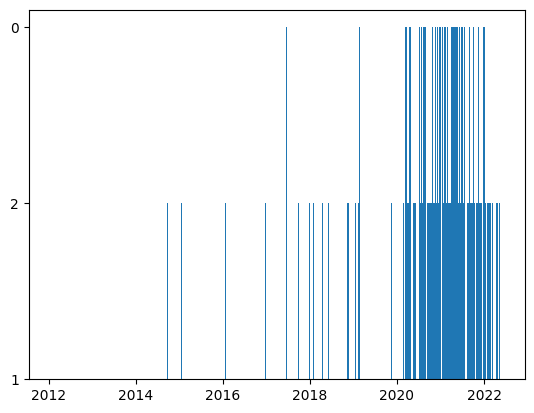

In [ ]:
plt.bar(dataframe["created_at"], predictions)

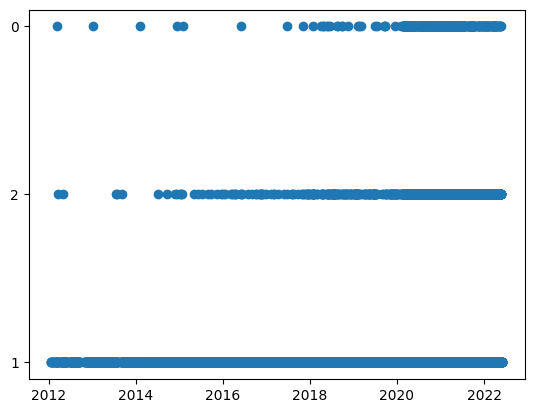

In [ ]:
plt.scatter(dataframe["created_at"], predictions)

In [ ]:
pd.Series(predictions).value_counts()

1    42201
2     2676
0      482
dtype: int64